# **DATA IMPORT AND PREPROCESSING**

In [347]:
#Import Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [376]:
hr = pd.read_csv('HR_comma_sep (1).csv')
hr.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [379]:
#Rename 'sales' column to department 
hr=hr.rename(columns = {'sales':'department'})
#Display data type for each column
hr.dtypes


satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
Department                object
salary                    object
dtype: object

In [382]:
#Check for Missing Values
hr.isnull().any()


satisfaction_level       False
last_evaluation          False
number_project           False
average_montly_hours     False
time_spend_company       False
Work_accident            False
left                     False
promotion_last_5years    False
Department               False
salary                   False
dtype: bool

In [383]:
#Dimensions of our dataset
hr.shape


(14999, 10)

In [384]:
#Summary for each variable
hr.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [388]:
#To get the unique values for department
hr['Department'].unique()

array(['sales', 'accounting', 'hr', 'technical', 'management',
       'product_mng', 'marketing', 'RandD'], dtype=object)

In [389]:
#Combine "technical","support" and "IT" into one department
hr['Department']=np.where(hr['Department'] =='support', 'technical', hr['Department'])
hr['Department']=np.where(hr['Department'] =='IT', 'technical', hr['Department'])

In [390]:
#Print the updated values of departments
print(hr['Department'].unique())


['sales' 'accounting' 'hr' 'technical' 'management' 'product_mng'
 'marketing' 'RandD']


# **DATA EXPLORATION**

In [391]:
hr['left'].value_counts()

0    11428
1     3571
Name: left, dtype: int64

In [357]:
hr.groupby('Department').mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
Department,,,,,,,,
RandD,0.619822,0.712122,3.853875,200.800508,3.367217,0.170267,0.153748,0.034307
accounting,0.582151,0.717718,3.825293,201.162973,3.522816,0.125163,0.265971,0.018253
hr,0.598809,0.708850,3.654939,198.684709,3.355886,0.120433,0.290934,0.020298
management,0.621349,0.724000,3.860317,201.249206,4.303175,0.163492,0.144444,0.109524
marketing,0.618601,0.715886,3.687646,199.385781,3.569930,0.160839,0.236597,0.050117
product_mng,0.619634,0.714756,3.807095,199.965632,3.475610,0.146341,0.219512,0.000000
sales,0.614447,0.709717,3.776329,200.911353,3.534058,0.141787,0.244928,0.024155
technical,0.613687,0.720976,3.839054,201.813795,3.416127,0.144106,0.246924,0.008258


In [358]:
hr.groupby('salary').mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
salary,,,,,,,,
high,0.637470,0.704325,3.767179,199.867421,3.692805,0.155214,0.066289,0.058205
low,0.600753,0.717017,3.799891,200.996583,3.438218,0.142154,0.296884,0.009021
medium,0.621817,0.717322,3.813528,201.338349,3.529010,0.145361,0.204313,0.028079


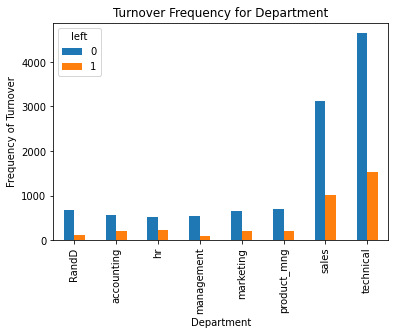

In [359]:
%matplotlib inline

#Bar chart for department employee work for and the frequency of turnover
pd.crosstab(hr.Department,hr.left).plot(kind='bar')
plt.title('Turnover Frequency for Department')
plt.xlabel('Department')
plt.ylabel('Frequency of Turnover')
plt.savefig('department_bar_chart')

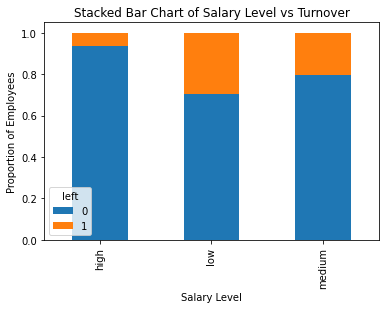

In [392]:
#Bar chart for employee salary level and the frequency of turnover
table=pd.crosstab(hr.salary, hr.left)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Salary Level vs Turnover')
plt.xlabel('Salary Level')
plt.ylabel('Proportion of Employees')
plt.savefig('salary_bar_chart')

In [393]:
#Proportion of employees left by department
pd.crosstab(hr.Department, hr.left)

left,0,1
Department,,
RandD,666,121
accounting,563,204
hr,524,215
management,539,91
marketing,655,203
product_mng,704,198
sales,3126,1014
technical,4651,1525


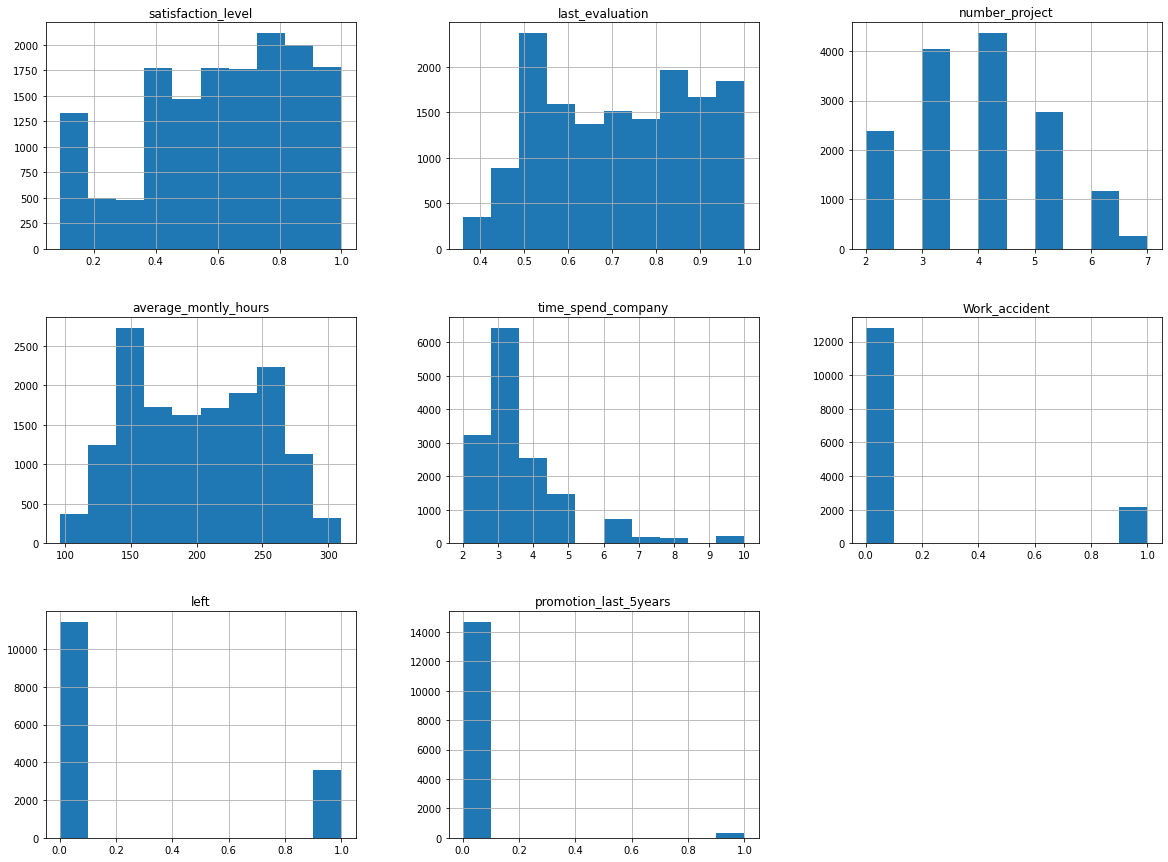

In [394]:
#Histogram of numeric variables
num_bins = 10

hr.hist(bins=num_bins, figsize=(20,15))
plt.savefig("hr_histogram_plots")
plt.show()

In [363]:
hr.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [395]:
catcols=set(hr.dtypes[hr.dtypes=='O'].index.values)
print(catcols)

{'Department', 'salary'}


In [396]:
from sklearn.preprocessing import LabelEncoder
from collections import Counter as c
x='*'
for i in catcols:
    print("LABEL ENCODING OF:",i)
    LE = LabelEncoder()
    print(c(hr[i]))
    #print(c(data[i]))
    hr[i] = LE.fit_transform(hr[i])
    #x_test_cat[i] = LEi.transform(x_test_cat[i])
    print(c(hr[i]))
    #print(c(x_test_cat[i]))
    print(x*100)

LABEL ENCODING OF: Department
Counter({'technical': 6176, 'sales': 4140, 'product_mng': 902, 'marketing': 858, 'RandD': 787, 'accounting': 767, 'hr': 739, 'management': 630})
Counter({7: 6176, 6: 4140, 5: 902, 4: 858, 0: 787, 1: 767, 2: 739, 3: 630})
****************************************************************************************************
LABEL ENCODING OF: salary
Counter({'low': 7316, 'medium': 6446, 'high': 1237})
Counter({1: 7316, 2: 6446, 0: 1237})
****************************************************************************************************


In [397]:
for i in catcols:
    table = pd.crosstab(hr[i],hr.left)
    print(table)
    from scipy.stats import chi2_contingency
    from scipy.stats import chi2
    chisquare, p, dof, expected = chi2_contingency(table)
    print('dof: ', dof)
    print('chisquare: ', chisquare)
    print('p: ' , p)
    print("*"*110)

left           0     1
Department            
0            666   121
1            563   204
2            524   215
3            539    91
4            655   203
5            704   198
6           3126  1014
7           4651  1525
dof:  7
chisquare:  81.43184416188933
p:  7.02990555909066e-15
**************************************************************************************************************
left       0     1
salary            
0       1155    82
1       5144  2172
2       5129  1317
dof:  2
chisquare:  381.22504706621066
p:  1.652086749295958e-83
**************************************************************************************************************


In [367]:
hr.columns.values

array(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'left', 'promotion_last_5years', 'Department', 'salary'],
      dtype=object)

In [368]:
X= hr.drop(['left'],axis=1)
y = hr['left']
X.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [369]:
X

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,0,6,1
1,0.80,0.86,5,262,6,0,0,6,2
2,0.11,0.88,7,272,4,0,0,6,2
3,0.72,0.87,5,223,5,0,0,6,1
4,0.37,0.52,2,159,3,0,0,6,1
...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,0,7,1
14995,0.37,0.48,2,160,3,0,0,7,1
14996,0.37,0.53,2,143,3,0,0,7,1
14997,0.11,0.96,6,280,4,0,0,7,1


In [370]:
#Split data into training and test samples
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [400]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scale=scaler.fit_transform(X_train)
import pickle
filename = 'scaler.pkl'
pickle.dump(scaler, open(filename, 'wb'))

In [372]:
X_scale

array([[0.48351648, 0.25      , 0.        , ..., 0.        , 1.        ,
        1.        ],
       [0.74725275, 0.265625  , 0.6       , ..., 0.        , 0.14285714,
        1.        ],
       [0.87912088, 0.671875  , 0.2       , ..., 0.        , 1.        ,
        1.        ],
       ...,
       [0.65934066, 0.90625   , 0.6       , ..., 0.        , 1.        ,
        1.        ],
       [0.75824176, 0.359375  , 0.6       , ..., 0.        , 1.        ,
        0.        ],
       [0.51648352, 0.5       , 0.6       , ..., 0.        , 1.        ,
        0.5       ]])

# **Random Forest**

In [373]:
#Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_scale, y_train)

RandomForestClassifier()

In [374]:
from sklearn.metrics import accuracy_score
print('Random Forest Accuracy: {:.3f}'.format(accuracy_score(y_test, rf.predict(X_test))))

Random Forest Accuracy: 0.504


C:\Users\Hello\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


# **10 Fold Cross Validation**

In [375]:
#For Random Forest
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
kfold = model_selection.KFold(n_splits=10, random_state=None)
modelCV = RandomForestClassifier()
scoring = 'accuracy'
results = model_selection.cross_val_score(modelCV, X_scale, y_train, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy for Random Forest Classifier: %.3f" % (results.mean()))

10-fold cross validation average accuracy for Random Forest Classifier: 0.990


# **Precision and Recall**

In [337]:
#Precison Recall Scores for Random Forest
from sklearn.metrics import classification_report
print(classification_report(y_test, rf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.78      0.23      0.36      3462
           1       0.23      0.79      0.36      1038

    accuracy                           0.36      4500
   macro avg       0.51      0.51      0.36      4500
weighted avg       0.66      0.36      0.36      4500



C:\Users\Hello\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


C:\Users\Hello\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


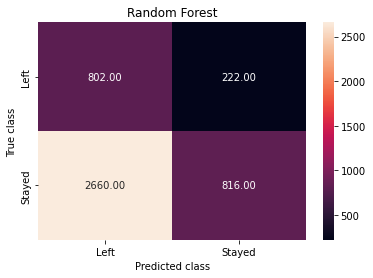

In [338]:
#Confusion Matrix for Random Forest
y_pred = rf.predict(X_test)
from sklearn.metrics import confusion_matrix
from sklearn import metrics
import seaborn as sns
forest_cm = metrics.confusion_matrix(y_pred, y_test)
sns.heatmap(forest_cm, annot=True, fmt='.2f',xticklabels = ["Left", "Stayed"] , yticklabels = ["Left",
                                                                                               "Stayed"] )
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('Random Forest')
plt.savefig('random_forest')

# **Variable Imporatnce for Random Forest Classifier**

In [339]:
feature_labels = np.array(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'promotion_last_5years', 'department', 'salary'])
importance = rf.feature_importances_
feature_indexes_by_importance = importance.argsort()
for index in feature_indexes_by_importance:
    print('{}-{:.2f}%'.format(feature_labels[index], (importance[index] *100.0)))


promotion_last_5years-0.11%
Work_accident-0.58%
salary-0.77%
department-1.00%
last_evaluation-12.12%
average_montly_hours-15.34%
number_project-16.35%
time_spend_company-18.25%
satisfaction_level-35.50%


# **Results & Conclusion**

In [340]:
filename = 'PAE_model.pkl'
pickle.dump(rf, open(filename, 'wb'))

In [341]:
X_train.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [342]:
X_train.Department

10438    7
9236     1
818      7
11503    7
11721    6
        ..
13123    0
3264     7
9845     7
10799    7
2732     7
Name: Department, Length: 10499, dtype: int32

In [343]:
print(c(hr['Department']))

Counter({7: 6176, 6: 4140, 5: 902, 4: 858, 0: 787, 1: 767, 2: 739, 3: 630})


In [344]:
name=rf.predict([[0.95,0.76,4,220,3,0,0,7,2]])

In [399]:
c(name)

Counter({0: 1})